In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import itertools


In [201]:
df = pd.read_csv('D:\\projects\\data\\fifa20\\players_20.csv')

In [202]:
# Remove unnessecry coulmns in the data
df.drop(['nation_position','nation_jersey_number','international_reputation','long_name','player_tags','team_jersey_number','sofifa_id','player_url'],axis=1,inplace=True)

df.rename(columns={'short_name':'Name','dob':'Birthday', 'height_cm':'Heigth', 'weight_kg':'Weight'},inplace = True)

In [203]:
#Show first 10 coulmns in the data
df.head(10)


,Name,age,Birthday,Heigth,Weight,nationality,club,overall,potential,value_eur,...,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits
0,L. Messi,32,24/06/1987,170,72,Argentina,FC Barcelona,94,94,95500000,...,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl..."
1,Cristiano Ronaldo,34,05/02/1985,187,83,Portugal,Juventus,93,93,58500000,...,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,..."
2,Neymar Jr,27,05/02/1992,175,68,Brazil,Paris Saint-Germain,92,92,105500000,...,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C..."
3,J. Oblak,26,07/01/1993,188,87,Slovenia,Atlético Madrid,91,93,77500000,...,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance"
4,E. Hazard,28,07/01/1991,175,74,Belgium,Real Madrid,91,91,90000000,...,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee..."
5,K. De Bruyne,28,28/06/1991,181,70,Belgium,Manchester City,91,91,90000000,...,86.0,61.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Avoids Using Weaker Foot, Div..."
6,M. ter Stegen,27,30/04/1992,187,85,Germany,FC Barcelona,90,93,67500000,...,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes"
7,V. van Dijk,27,08/07/1991,193,92,Netherlands,Liverpool,90,91,78000000,...,71.0,90.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Avoids Using Weaker Foot, Leadership, L..."
8,L. Modrić,33,09/09/1985,172,66,Croatia,Real Madrid,90,90,45000000,...,89.0,72.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Speed Dri..."
9,M. Salah,27,15/06/1992,175,71,Egypt,Liverpool,90,90,80500000,...,89.0,45.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl..."


In [204]:
# Show the last 10 values in the data
df.tail()

,Name,age,Birthday,Heigth,Weight,nationality,club,overall,potential,value_eur,...,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits
18273,Shao Shuai,22,10/03/1997,186,79,China PR,Beijing Renhe FC,48,56,40000,...,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18274,Xiao Mingjie,22,01/01/1997,177,66,China PR,Shanghai SIPG FC,48,56,40000,...,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18275,Zhang Wei,19,16/05/2000,186,75,China PR,Hebei China Fortune FC,48,56,40000,...,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18276,Wang Haijian,18,02/08/2000,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,...,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18277,Pan Ximing,26,11/01/1993,182,78,China PR,Hebei China Fortune FC,48,51,40000,...,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
#now we need to hande with te missinng value
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Name,Name,0.000000
age,age,0.000000
Birthday,Birthday,0.000000
Heigth,Heigth,0.000000
Weight,Weight,0.000000
nationality,nationality,0.000000
club,club,0.000000
overall,overall,0.000000
potential,potential,0.000000
value_eur,value_eur,0.000000


In [206]:
# Inserting NaN to those misiing cell values
df.fillna('NaN',inplace =True)

In [207]:
player_positions_count = df['player_positions']
player_positions_count = player_positions_count.str.count(',')+1
df['count_player_positions'] = player_positions_count

In [208]:
potential_players = df.loc[(df['potential']>79) & (df['age']<21)]


In [209]:
potential_players.describe()

,age,Heigth,Weight,overall,potential,value_eur,wage_eur,weak_foot,skill_moves,count_player_positions
count,529.000000,529.000000,529.000000,529.000000,529.000000,5.290000e+02,529.000000,529.000000,529.000000,529.000000
mean,18.935728,180.453686,72.725898,67.466919,82.807183,3.609112e+06,9221.172023,3.090737,2.706994,1.725898
std,0.990308,6.571160,6.437823,4.944708,2.517489,6.688977e+06,14109.496243,0.653726,0.777993,0.729850
min,16.000000,163.000000,56.000000,55.000000,80.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000
25%,18.000000,176.000000,68.000000,64.000000,81.000000,9.000000e+05,1000.000000,3.000000,2.000000,1.000000
50%,19.000000,180.000000,73.000000,67.000000,82.000000,1.500000e+06,4000.000000,3.000000,3.000000,2.000000
75%,20.000000,185.000000,77.000000,70.000000,84.000000,3.800000e+06,11000.000000,3.000000,3.000000,2.000000
max,20.000000,202.000000,93.000000,89.000000,95.000000,9.350000e+07,155000.000000,5.000000,5.000000,3.000000


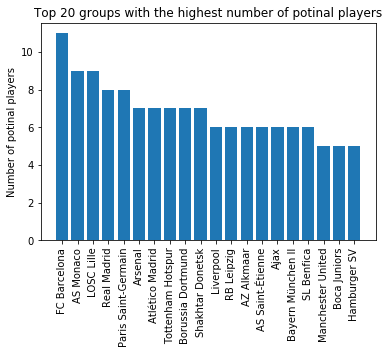

In [210]:


df_pp_by_club = potential_players['club'].value_counts()

df_pp_by_club = pd.DataFrame(df_pp_by_club)

df_pp_by_club = df_pp_by_club.reset_index()
df_pp_by_club.columns = ['Clubs', 'Players']


df_pp_by_club =df_pp_by_club.head(20)

plt.bar(df_pp_by_club['Clubs'], df_pp_by_club['Players'])
plt.xticks(ticks=df_pp_by_club['Clubs'])
plt.xticks(rotation=90)

plt.ylabel('Number of potinal players')
plt.title('Top 20 groups with the highest number of potinal players')
plt.savefig('Top 20 groups with the highest number of potinal players.png')

plt.show()



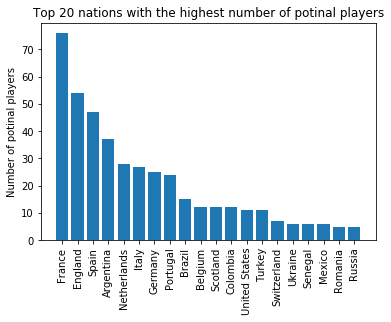

In [229]:
df_temp = potential_players['nationality'].value_counts()

df_temp = pd.DataFrame(df_temp)

df_temp = df_temp.reset_index()


df_temp.columns = ['Nationality', 'Players']

df_temp =df_temp.head(20)

plt.bar(df_temp['Nationality'], df_temp['Players'])
plt.xticks(ticks=df_temp['Nationality'])
plt.xticks(rotation=90)

plt.ylabel('Number of potinal players')
plt.title('Top 20 nations with the highest number of potinal players')
plt.savefig('Top 20 nations with the highest number of potinal players.png')
plt.autoscale()

plt.show()


In [212]:
df_wf = potential_players['weak_foot'].value_counts()
df_wf = pd.DataFrame(df_wf).sort_values('weak_foot')
df_wf

,weak_foot
1,1
5,15
2,73
4,93
3,347


C:\Users\Yuval\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


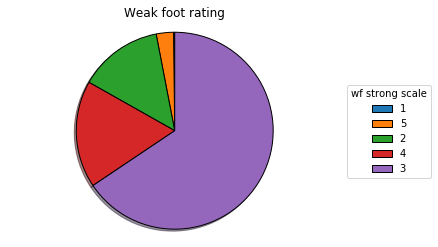

In [213]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

rating = ['1','5','2','4','3']
fig1, ax1 = plt.subplots()
ax1.pie(df_wf, shadow=True, startangle=90,wedgeprops={'edgecolor':'black'})
ax1.axis('Equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(rating,
          title="wf strong scale",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("Weak foot rating")
plt.savefig('Weak foot rating.png')

plt.show()



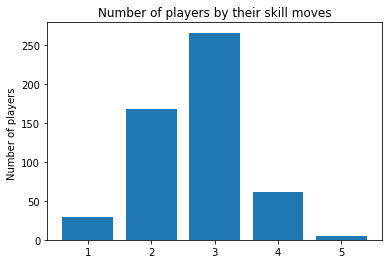

In [214]:
df_sm = potential_players['skill_moves'].value_counts()
df_temp = pd.DataFrame(df_sm)

df_temp = df_temp.reset_index()


df_temp.columns = ['skill moves', 'Players']


plt.bar(df_temp['skill moves'], df_temp['Players'])
plt.xticks(ticks=df_temp['skill moves'])


plt.ylabel('Number of players ')
plt.title('Number of players by their skill moves')
plt.savefig('Number of players by their skill moves.png')

plt.show()


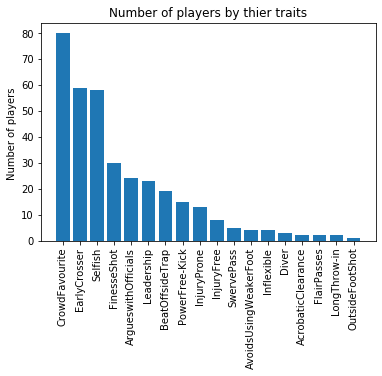

In [215]:
df_pt = potinal_players['player_traits']
# player treits
value_list = ["NaN"]
in_bool_ser = ~potinal_players.player_traits.isin(value_list)
df_pt = df_pt[in_bool_ser]

df_pt = df_pt.str.replace(' ', '')
df_pt = collections.Counter(itertools.chain.from_iterable(v.split(',') for v in df_pt))
df_pt = pd.DataFrame(list(df_pt.items()),columns=['trait','count'])
df_pt = df_pt[~df_pt['trait'].str.contains("CPUAIOnly")]

df_pt = df_pt.sort_values(by='count',ascending = False)

plt.bar(df_pt['trait'], df_pt['count'],width=0.8)
plt.xticks(ticks=df_pt['trait'],rotation = 90)


plt.ylabel('Number of players ')
plt.title('Number of players by thier traits')
plt.savefig('Number of players by thier traits.png')

plt.show()






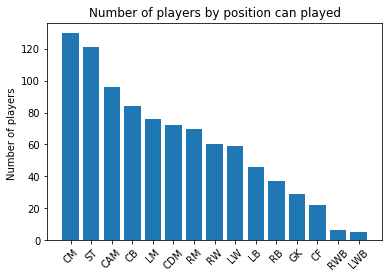

In [216]:
# creating dataframe for  the postions of potinal players
player_positions = potential_players['player_positions']
player_positions = player_positions.str.replace(' ', '')
player_positions = collections.Counter(itertools.chain.from_iterable(v.split(',') for v in player_positions))
player_positions = pd.DataFrame(list(player_positions.items()),columns=['position','count'])
player_positions = player_positions.sort_values(by='count',ascending = False)

plt.bar(player_positions['position'], player_positions['count'],width=0.8)
plt.xticks(ticks=player_positions['position'],rotation = 45)


plt.ylabel('Number of players ')
plt.title('Number of players by position can played')
plt.savefig('Number of players by position can played.png')

plt.show()




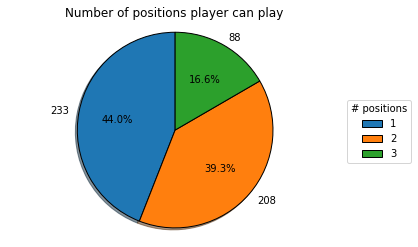

In [217]:
potential_players.drop(['player_positions'], axis=1)

potinal_players['count_player_positions']
df_pp_count_positions = potinal_players['count_player_positions'].value_counts()

#df_pp_count_positions = pd.DataFrame(df_pp_count_positions)

num_of_positions = [1,2,3]
labels = [1,2,3]

fig1, ax1 = plt.subplots()
ax1.pie(df_pp_count_positions, shadow=True, startangle=90,wedgeprops={'edgecolor':'black'},labels = df_pp_count_positions,autopct='%1.1f%%')
ax1.axis('Equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(num_of_positions,
          title="# positions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("Number of positions player can play")
plt.savefig('Number of positions player can play.png')

plt.show()







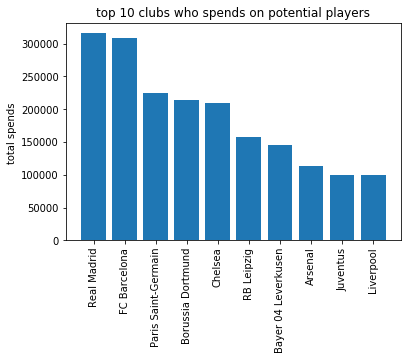

In [218]:
df_teams_invenst = potinal_players.groupby(['club'])['wage_eur'].sum()
df_teams_invenst = pd.DataFrame(df_teams_invenst)
df_teams_invenst = df_teams_invenst.reset_index()
df_top10_teams_invenst= df_teams_invenst.sort_values(by='wage_eur',ascending = False).head(10)
df_top10_teams_invenst = pd.DataFrame(df_top10_teams_invenst)

plt.bar(df_top10_teams_invenst['club'], df_top10_teams_invenst['wage_eur'],width=0.8)
plt.xticks(ticks=df_top10_teams_invenst['club'],rotation = (90))


plt.ylabel('total spends ')
plt.title('top 10 clubs who spends on potential players')
plt.savefig('top 10 clubs who spends on potential players.png')

plt.show()






In [219]:
# Analysing embape

df_fifa_17 = pd.read_csv("D:\\projects\\data\\fifa20\\players_17.csv") 
df_fifa_18 = pd.read_csv("D:\\projects\\data\\fifa20\\players_18.csv") 
df_fifa_19 = pd.read_csv("D:\\projects\\data\\fifa20\\players_19.csv")
df_fifa_20 = pd.read_csv("D:\\projects\\data\\fifa20\\players_20.csv")

fifa_id = 231747
Kylian_em_17 = df_fifa_17.loc[df_fifa_17.sofifa_id == fifa_id] 
Kylian_em_18 = df_fifa_18.loc[df_fifa_18.sofifa_id == fifa_id] 
Kylian_em_19 = df_fifa_19.loc[df_fifa_19.sofifa_id == fifa_id] 
Kylian_em_20 = df_fifa_20.loc[df_fifa_20.sofifa_id == fifa_id] 

Kylian = pd.concat([Kylian_em_17, Kylian_em_18,Kylian_em_19,Kylian_em_20], ignore_index=True)



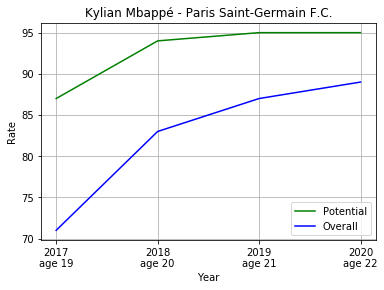

In [220]:

years = ["2017\nage 19","2018\nage 20","2019\nage 21","2020\nage 22"]

Kylian_potential = Kylian['potential']
Kylian_overall = Kylian['overall']
Kylian_value = Kylian['value_eur']


fig, ax = plt.subplots()
ax.plot(years, Kylian_potential,color='Green',label='Potential')
ax.plot(years,Kylian_overall,color='Blue',label='Overall')
ax.set(xlabel='Year', ylabel='Rate', title='Kylian Mbappé - Paris Saint-Germain F.C.')
ax.grid()
ax.set_xticks(years)

plt.legend()

plt.show()


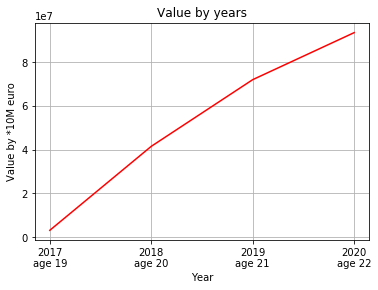

In [221]:
fig1, ax1 = plt.subplots()


ax1.plot(years, Kylian_value,color='Red')
ax1.set(xlabel='Year', ylabel='Value by *10M euro',title='Value by years')
ax1.grid()

ax1.set_xticks(years)

plt.savefig('Kylian Mbappé2.png')

plt.show()

In [222]:
# analyse de ligt

df_fifa_17 = pd.read_csv("D:\\projects\\data\\fifa20\\players_17.csv") 
df_fifa_18 = pd.read_csv("D:\\projects\\data\\fifa20\\players_18.csv") 
df_fifa_19 = pd.read_csv("D:\\projects\\data\\fifa20\\players_19.csv")
df_fifa_20 = pd.read_csv("D:\\projects\\data\\fifa20\\players_20.csv")

fifa_id = 235243
de_ligt_17 = df_fifa_17.loc[df_fifa_17.sofifa_id == fifa_id] 
de_ligt_18 = df_fifa_18.loc[df_fifa_18.sofifa_id == fifa_id] 
de_ligt_19 = df_fifa_19.loc[df_fifa_19.sofifa_id == fifa_id] 
de_ligt_20 = df_fifa_20.loc[df_fifa_20.sofifa_id == fifa_id] 

de_ligt = pd.concat([de_ligt_17, de_ligt_18,de_ligt_19,de_ligt_20], ignore_index=True)

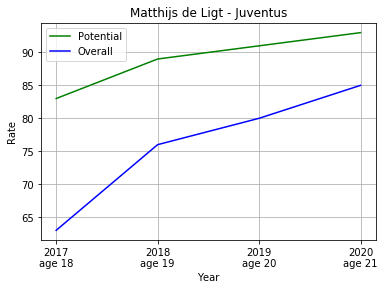

In [223]:
# Data for plotting
years = ["2017\nage 18","2018\nage 19","2019\nage 20","2020\nage 21"]

de_ligt_potential = de_ligt['potential']
de_ligt_overall = de_ligt['overall']
de_ligt_value = de_ligt['value_eur']


fig, ax = plt.subplots()
ax.plot(years, de_ligt_potential,color='Green',label='Potential')
ax.plot(years,de_ligt_overall,color='Blue',label='Overall')
ax.set(xlabel='Year', ylabel='Rate', title='Matthijs de Ligt - Juventus')
ax.grid()
ax.set_xticks(years)
plt.savefig('Matthijs de Ligt1.png')

plt.legend()





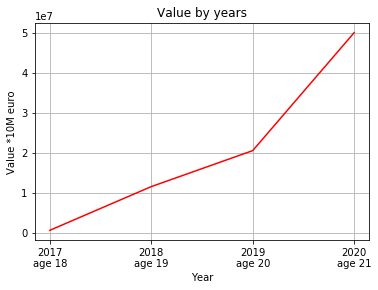

In [224]:

fig1, ax1 = plt.subplots()


ax1.plot(years, de_ligt_value,color='Red')
ax1.set(xlabel='Year', ylabel='Value *10M euro',title='Value by years')
ax1.grid()
ax1.set_xticks(years)

plt.savefig('Matthijs de Ligt2.png')
plt.show()

In [225]:
# analyse de ligt

df_fifa_17 = pd.read_csv("D:\\projects\\data\\fifa20\\players_17.csv") 
df_fifa_18 = pd.read_csv("D:\\projects\\data\\fifa20\\players_18.csv") 
df_fifa_19 = pd.read_csv("D:\\projects\\data\\fifa20\\players_19.csv")
df_fifa_20 = pd.read_csv("D:\\projects\\data\\fifa20\\players_20.csv")

fifa_id = 233049
sancho_17 = df_fifa_17.loc[df_fifa_17.sofifa_id == fifa_id] 
sancho_18 = df_fifa_18.loc[df_fifa_18.sofifa_id == fifa_id] 
sancho_19 = df_fifa_19.loc[df_fifa_19.sofifa_id == fifa_id] 
sancho_20 = df_fifa_20.loc[df_fifa_20.sofifa_id == fifa_id] 

sancho = pd.concat([sancho_17, sancho_18,sancho_19,sancho_20], ignore_index=True)

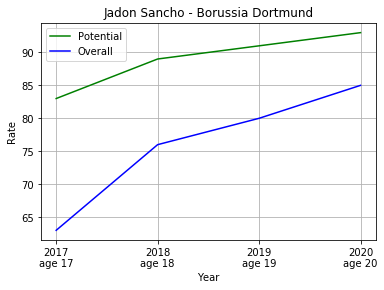

In [226]:
# Data for plotting
years = ["2017\nage 17","2018\nage 18","2019\nage 19","2020\nage 20"]

sancho_potential = de_ligt['potential']
sancho_overall = de_ligt['overall']
sancho_value = de_ligt['value_eur']


fig, ax = plt.subplots()
ax.plot(years, sancho_potential,color='Green',label='Potential')
ax.plot(years,sancho_overall,color='Blue',label='Overall')
ax.set(xlabel='Year', ylabel='Rate', title='Jadon Sancho - Borussia Dortmund')
ax.grid()
ax.set_xticks(years)

plt.legend()

plt.savefig('Jadon Sancho1.png',bbox_inches='tight')

plt.show()



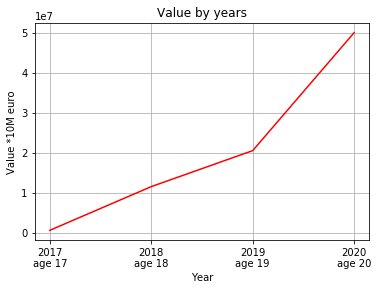

In [227]:
fig1, ax1 = plt.subplots()


ax1.plot(years, sancho_value,color='Red')
ax1.set(xlabel='Year', ylabel='Value *10M euro',title='Value by years')
ax1.grid()
ax1.set_xticks(years)
plt.savefig('Jadon Sancho2.png',bbox_inches='tight')

plt.show()